<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [66]:
# created a simple toy_dataset :
hours_studied = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
pass_exm = np.array([0,0,0,0,1,1,1,1,1])

df = pd.DataFrame({
    'hours_studied': hours_studied.flatten(),
    'pass_exm': pass_exm
})
df

,hours_studied,pass_exm
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [67]:
toy_model = LogisticRegression()
toy_model.fit(hours_studied,pass_exm)
print('intercept(b):',toy_model.intercept_)
print('coefficient(w):',toy_model.coef_)

intercept(b): [-5.29559243]
coefficient(w): [[1.17808562]]


In [68]:
#predicted probability for rang of study :
hours_grid = np.linspace(0,10,20).reshape(-1,1)
pass_prob = toy_model.predict_proba(hours_grid)[:,1]

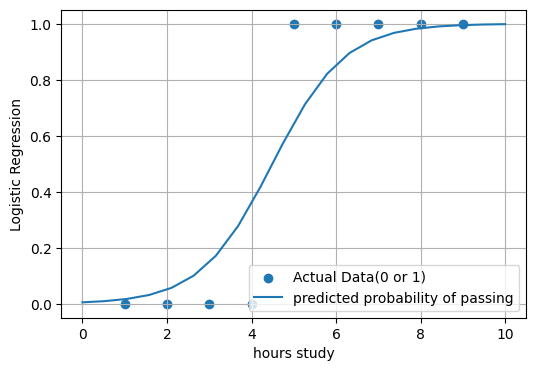

In [69]:
#plot :
plt.figure(figsize=(6,4))
plt.scatter(hours_studied,pass_exm,label="Actual Data(0 or 1)")
plt.plot(hours_grid,pass_prob,label= "predicted probability of passing")
plt.xlabel("hours study")
plt.ylabel("Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# predict for a few exmple student :
exmp_hours = np.array([[2],[4],[6],[8]])
exmp_probs = toy_model.predict_proba(exmp_hours)[:,1]
exmp_pred = toy_model.predict(exmp_hours)

rlt_df = pd.DataFrame({
    "hours_studied": exmp_hours.flatten(),
    "Predicted_probability_pass": np.round(exmp_probs, 4),
    "Predicted_class": exmp_pred
})
rlt_df

,hours_studied,Predicted_probability_pass,Predicted_class
0,2,0.0502,0
1,4,0.3582,0
2,6,0.8548,1
3,8,0.9842,1


In [71]:
#sigmoid
def sigmoid(z):
  return 1/(1+np.exp(-z))
z_values = np.array([-5,-2,-1,0,1,2,5],dtype=float)
sig_values = sigmoid(z_values)
sig_df = pd.DataFrame({
    "z": z_values,
    "sigmoid": np.round(sig_values,4)
})
sig_df



,z,sigmoid
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


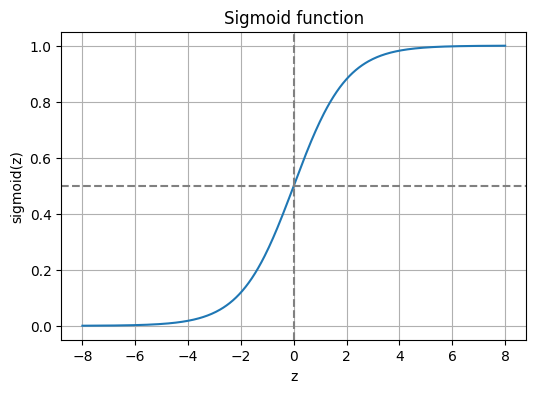

In [72]:
z_grid = np.linspace(-8,8,400)
sig_grid = sigmoid(z_grid)

plt.figure(figsize=(6, 4))
plt.plot(z_grid, sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

In [73]:
#simple threshold demonstration
probability = np.array([0.1,0.3,0.49,0.5,0.7,0.9])
threshold =0.5
pred_class = (probability>=threshold).astype(int)
df = pd.DataFrame({
    "probability": probability,
    "predcition": pred_class
})
df

,probability,predcition
0,0.10,0
1,0.30,0
2,0.49,0
3,0.50,1
4,0.70,1
5,0.90,1


In [74]:
data = load_breast_cancer()
X_full = data.data
y_full =data.target

print(X_full.shape)
print(y_full.shape)
print(data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


In [75]:
feature_name = data.feature_names
df = pd.DataFrame(X_full,columns=feature_name)
df['target'] = y_full
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [76]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [77]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Test Accuracy:  0.9824561403508771


In [88]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[41  1]
 [ 1 71]]


In [89]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



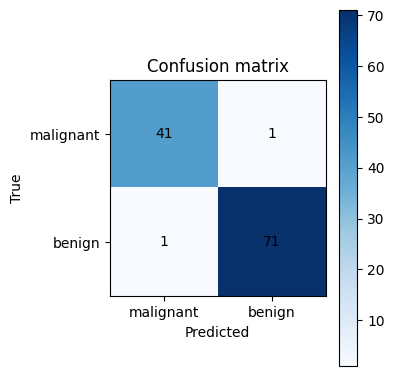

In [90]:
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion matrix")
plt.colorbar()
tick_labels = data.target_names
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [92]:
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)

Accuracy:  0.9824561403508771
Precision:  0.9861111111111112
Recall:  1.0
F1 Score:  0.9861111111111112


In [96]:
# Try different thresholds and see how precision and recall change
thresholds = np.linspace(0.1, 0.9, 9)#0.1,0.2,0.3,0.4...
rows = []

for thr in thresholds:
    y_thr_pred = (y_test_proba >= thr).astype(int)
    acc_thr = accuracy_score(y_test, y_thr_pred)
    prec_thr = precision_score(y_test, y_thr_pred)
    rec_thr = recall_score(y_test, y_thr_pred)
    f1_thr = f1_score(y_test, y_thr_pred)
    rows.append([thr, acc_thr, prec_thr, rec_thr, f1_thr])

thr_df = pd.DataFrame(rows, columns=["threshold", "accuracy", "precision", "recall", "f1"])
thr_df

,threshold,accuracy,precision,recall,f1
0,0.1,0.956140,0.935065,1.000000,0.966443
1,0.2,0.982456,0.972973,1.000000,0.986301
2,0.3,0.982456,0.972973,1.000000,0.986301
3,0.4,0.982456,0.986111,0.986111,0.986111
4,0.5,0.982456,0.986111,0.986111,0.986111
5,0.6,0.956140,0.985507,0.944444,0.964539
6,0.7,0.947368,0.985294,0.930556,0.957143
7,0.8,0.938596,0.985075,0.916667,0.949640
8,0.9,0.894737,0.983871,0.847222,0.910448


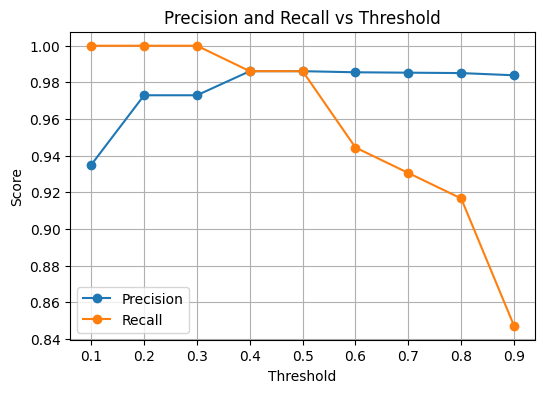

In [97]:
plt.figure(figsize=(6, 4))
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.grid(True)
plt.legend()
plt.show()